In [49]:
from os import listdir
import xarray
import matplotlib.pyplot as plt
import nc_time_axis

DATA_DIR = "/projects/dgs/persad_research/heat_research/data/emissions_inventory/RCP85/"
rcp_anthro_oc = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if ".nc" in path and "anthropogenic" in path and "_OC_" in path])
rcp_anthro_bc = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR ) if ".nc" in path and "anthropogenic" in path and "_BC_" in path])
rcp_anthro_sot = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if ".nc" in path and "anthropogenic" in path and "_SO2_" in path])

#rcp_aircraft_oc = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if ".nc" in path and "aircraft" in path and "_OC_" in path])
rcp_aircraft_bc = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if ".nc" in path and "aircraft" in path and "_BC_" in path])
#rcp_aircraft_sot = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if ".nc" in path and "aircraft" in path and "_SO2_" in path])

rcp_ships_oc = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if ".nc" in path and "ships" in path and "_OC_" in path])
rcp_ships_bc = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if ".nc" in path and "ships" in path and "_BC_" in path])
rcp_ships_sot = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if ".nc" in path and "ships" in path and "_SO2_" in path])

rcp_bc = rcp_anthro_bc["emiss_ene"] + rcp_anthro_bc["emiss_dom"] + rcp_anthro_bc["emiss_ind"] + rcp_anthro_bc["emiss_tra"]
rcp_bc += rcp_anthro_bc["emiss_wst"] + rcp_anthro_bc["emiss_agr"] + rcp_anthro_bc["emiss_slv"] + rcp_anthro_bc["emiss_awb"]
rcp_bc += rcp_ships_bc["emiss_shp"]

rcp_oc = rcp_anthro_oc["emiss_ene"] + rcp_anthro_oc["emiss_dom"] + rcp_anthro_oc["emiss_ind"] + rcp_anthro_oc["emiss_tra"]
rcp_oc += rcp_anthro_oc["emiss_wst"] + rcp_anthro_oc["emiss_agr"] + rcp_anthro_oc["emiss_slv"] + rcp_anthro_oc["emiss_awb"]
rcp_oc += rcp_ships_oc["emiss_shp"]# + rcp_aircraft_oc["emiss_air"].sum(dim="lev")

rcp_sot = rcp_anthro_sot["emiss_ene"] + rcp_anthro_sot["emiss_dom"] + rcp_anthro_sot["emiss_ind"] + rcp_anthro_sot["emiss_tra"]
rcp_sot += rcp_anthro_sot["emiss_wst"] + rcp_anthro_sot["emiss_agr"] + rcp_anthro_sot["emiss_slv"] + rcp_anthro_sot["emiss_awb"]
rcp_sot += rcp_ships_sot["emiss_shp"]# + rcp_aircraft_sot["emiss_air"].sum(dim="lev")


DATA_DIR = "/projects/dgs/persad_research/heat_research/data/emissions_inventory/historical/"

hist_bc = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if "BC" in path and ".nc" in path]).sum(dim="sector", keep_attrs=True)["BC_em_anthro"]
hist_oc = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if "OC" in path and ".nc" in path]).sum(dim="sector", keep_attrs=True)["OC_em_anthro"]
hist_sot = xarray.open_mfdataset([DATA_DIR + path for path in listdir(DATA_DIR) if "SO2" in path and ".nc" in path]).sum(dim="sector", keep_attrs=True)["SO2_em_anthro"]

hist_bc["time"] = hist_bc.indexes['time'].to_datetimeindex()
hist_oc["time"] = hist_oc.indexes['time'].to_datetimeindex()
hist_sot["time"] = hist_sot.indexes['time'].to_datetimeindex()

rcp_bc_ts = rcp_bc.mean(dim="lat").mean(dim="lon").sel(time=slice('2000-01-15T00:00:00.000000000', '2021-12-15T00:00:00.000000000'))
rcp_oc_ts = rcp_oc.mean(dim="lat").mean(dim="lon").sel(time=slice('2000-01-15T00:00:00.000000000', '2021-12-15T00:00:00.000000000'))
rcp_sot_ts = rcp_sot.mean(dim="lat").mean(dim="lon").sel(time=slice('2000-01-15T00:00:00.000000000', '2021-12-15T00:00:00.000000000'))

hist_bc_ts = hist_bc.mean(dim="lat").mean(dim="lon").sel(time=slice('2000-01-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000'))
hist_oc_ts = hist_oc.mean(dim="lat").mean(dim="lon").sel(time=slice('2000-01-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000'))
hist_sot_ts = hist_sot.mean(dim="lat").mean(dim="lon").sel(time=slice('2000-01-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000'))

/projects/dgs/rh5_local/anaconda/climate/envs/heat/lib/python3.10/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_282152/2251070302.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  hist_bc["time"] = hist_bc.indexes['time'].to_datetimeindex()
/tmp/ipykernel_282152/2251070302.py:39: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  hist_oc["time"] = hist_oc.indexes['time'].to_datetimeindex()
/tmp/ipykernel_282152/22510

In [53]:
rcp_sot.time

<xarray.DataArray 'time' (time: 144)>
array(['2000-01-15T00:00:00.000000000', '2000-02-15T00:00:00.000000000',
       '2000-03-15T00:00:00.000000000', '2000-04-15T00:00:00.000000000',
       '2000-05-15T00:00:00.000000000', '2000-06-15T00:00:00.000000000',
       '2000-07-15T00:00:00.000000000', '2000-08-15T00:00:00.000000000',
       '2000-09-15T00:00:00.000000000', '2000-10-15T00:00:00.000000000',
       '2000-11-15T00:00:00.000000000', '2000-12-15T00:00:00.000000000',
       '2005-01-15T00:00:00.000000000', '2005-02-15T00:00:00.000000000',
       '2005-03-15T00:00:00.000000000', '2005-04-15T00:00:00.000000000',
       '2005-05-15T00:00:00.000000000', '2005-06-15T00:00:00.000000000',
       '2005-07-15T00:00:00.000000000', '2005-08-15T00:00:00.000000000',
       '2005-09-15T00:00:00.000000000', '2005-10-15T00:00:00.000000000',
       '2005-11-15T00:00:00.000000000', '2005-12-15T00:00:00.000000000',
       '2010-01-15T00:00:00.000000000', '2010-02-15T00:00:00.000000000',
       '2010-03-15T00:00:00.000000000', '2010-04-15T00:00:00.000000000',
       '2010-05-15T00:00:00.000000000', '2010-06-15T00:00:00.000000000',
       '2010-07-15T00:00:00.000000000', '2010-08-15T00:00:00.000000000',
       '2010-09-15T00:00:00.000000000', '2010-10-15T00:00:00.000000000',
       '2010-11-15T00:00:00.000000000', '2010-12-15T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-02-15T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-04-15T00:00:00.000000000',
       '2020-05-15T00:00:00.000000000', '2020-06-15T00:00:00.000000000',
       '2020-07-15T00:00:00.000000000', '2020-08-15T00:00:00.000000000',
       '2020-09-15T00:00:00.000000000', '2020-10-15T00:00:00.000000000',
       '2020-11-15T00:00:00.000000000', '2020-12-15T00:00:00.000000000',
       '2030-01-15T00:00:00.000000000', '2030-02-15T00:00:00.000000000',
       '2030-03-15T00:00:00.000000000', '2030-04-15T00:00:00.000000000',
       '2030-05-15T00:00:00.000000000', '2030-06-15T00:00:00.000000000',
       '2030-07-15T00:00:00.000000000', '2030-08-15T00:00:00.000000000',
       '2030-09-15T00:00:00.000000000', '2030-10-15T00:00:00.000000000',
       '2030-11-15T00:00:00.000000000', '2030-12-15T00:00:00.000000000',
       '2040-01-15T00:00:00.000000000', '2040-02-15T00:00:00.000000000',
       '2040-03-15T00:00:00.000000000', '2040-04-15T00:00:00.000000000',
       '2040-05-15T00:00:00.000000000', '2040-06-15T00:00:00.000000000',
       '2040-07-15T00:00:00.000000000', '2040-08-15T00:00:00.000000000',
       '2040-09-15T00:00:00.000000000', '2040-10-15T00:00:00.000000000',
       '2040-11-15T00:00:00.000000000', '2040-12-15T00:00:00.000000000',
       '2050-01-15T00:00:00.000000000', '2050-02-15T00:00:00.000000000',
       '2050-03-15T00:00:00.000000000', '2050-04-15T00:00:00.000000000',
       '2050-05-15T00:00:00.000000000', '2050-06-15T00:00:00.000000000',
       '2050-07-15T00:00:00.000000000', '2050-08-15T00:00:00.000000000',
       '2050-09-15T00:00:00.000000000', '2050-10-15T00:00:00.000000000',
       '2050-11-15T00:00:00.000000000', '2050-12-15T00:00:00.000000000',
       '2060-01-15T00:00:00.000000000', '2060-02-15T00:00:00.000000000',
       '2060-03-15T00:00:00.000000000', '2060-04-15T00:00:00.000000000',
       '2060-05-15T00:00:00.000000000', '2060-06-15T00:00:00.000000000',
       '2060-07-15T00:00:00.000000000', '2060-08-15T00:00:00.000000000',
       '2060-09-15T00:00:00.000000000', '2060-10-15T00:00:00.000000000',
       '2060-11-15T00:00:00.000000000', '2060-12-15T00:00:00.000000000',
       '2070-01-15T00:00:00.000000000', '2070-02-15T00:00:00.000000000',
       '2070-03-15T00:00:00.000000000', '2070-04-15T00:00:00.000000000',
       '2070-05-15T00:00:00.000000000', '2070-06-15T00:00:00.000000000',
       '2070-07-15T00:00:00.000000000', '2070-08-15T00:00:00.000000000',
       '2070-09-15T00:00:00.000000000', '2070-10-15T00:00:00.000000000',
       '2070-11-15T00:00:00.000000000', '2070-12-15T00:00:00.000000000',
       '2080-01-15T0

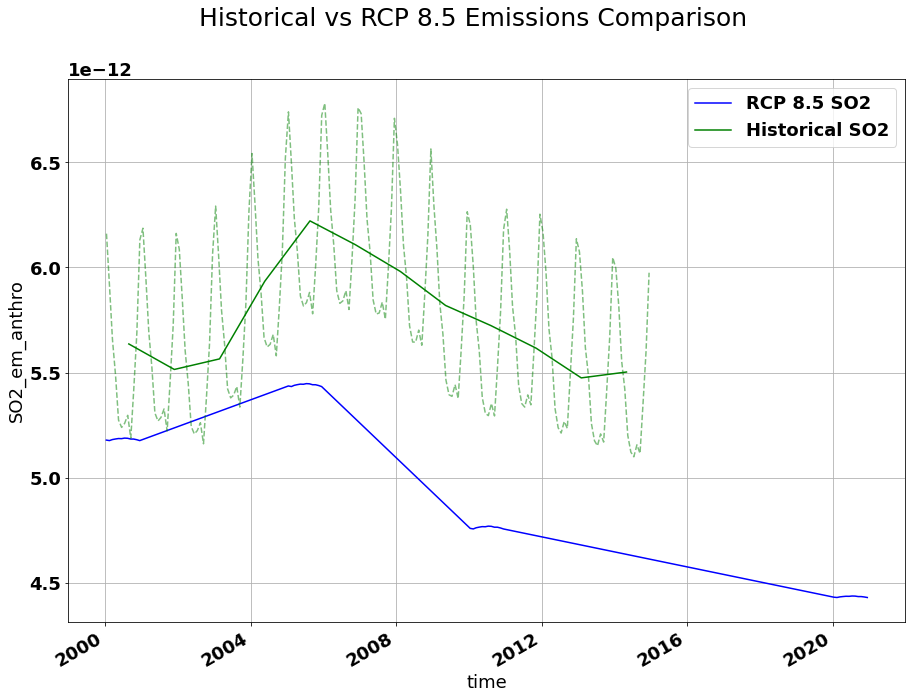

In [76]:
from matplotlib import rc

f, ax = plt.subplots(1, 1, figsize=(15, 10), facecolor='w')
f.suptitle("Historical vs RCP 8.5 Emissions Comparison", fontsize=25)
rc('font', **{'weight': 'bold', 'size': 18})


rcp_sot_ts.plot(ax=ax, color='blue', label="RCP 8.5 SO2")
hist_sot_ts.groupby_bins(hist_sot_ts["time"],12).mean().plot(ax=ax, linestyle="-", color='green', label="Historical SO2")
hist_sot_ts.plot(ax=ax, linestyle="--", color='green', alpha=0.5)

ax.legend()
ax.grid()

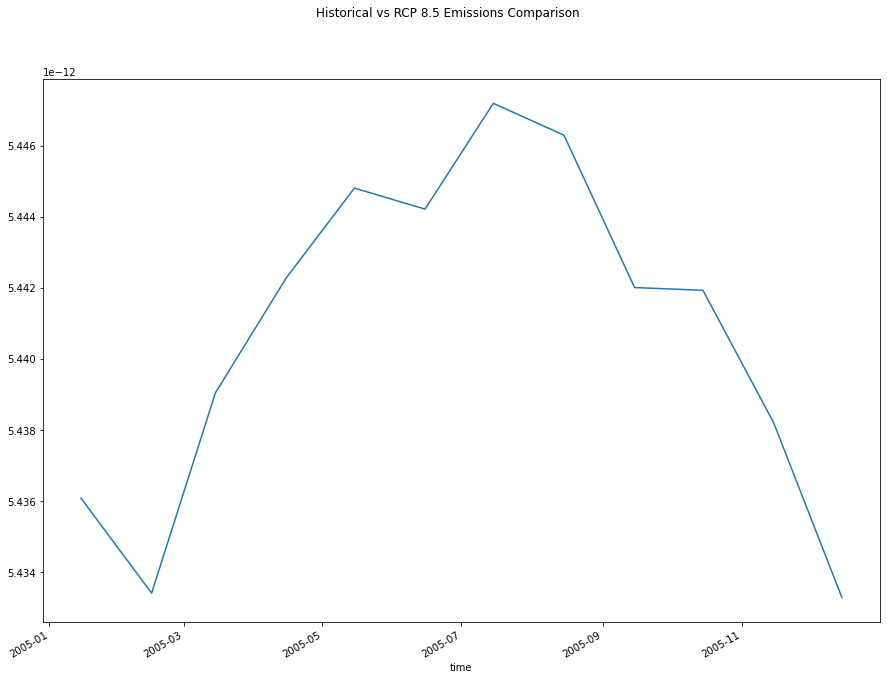

In [58]:
f, ax = plt.subplots(1, 1, figsize=(15, 10), facecolor='w')
f.suptitle("Historical vs RCP 8.5 Emissions Comparison")
rcp_sot.mean(dim="lat").mean(dim="lon").sel(time=slice("2005-01-15T00:00:00.000000000", "2005-12-15T00:00:00.000000000")).plot(ax=ax)

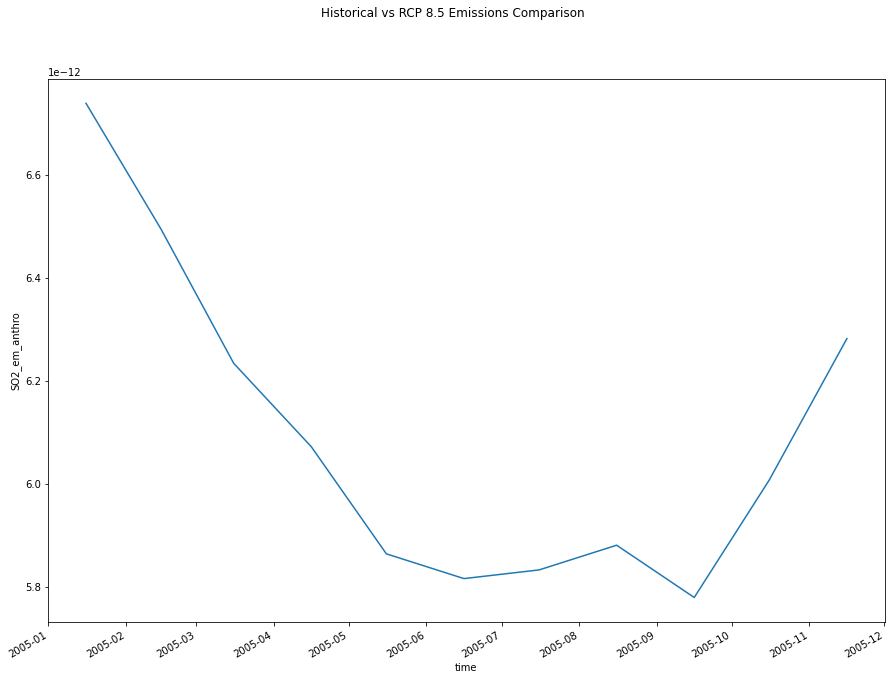

In [59]:
f, ax = plt.subplots(1, 1, figsize=(15, 10), facecolor='w')
f.suptitle("Historical vs RCP 8.5 Emissions Comparison")
hist_sot.mean(dim="lat").mean(dim="lon").sel(time=slice("2005-01-15T00:00:00.000000000", "2005-12-15T00:00:00.000000000")).plot(ax=ax)